#### 
### MNIST: database of handwritten digits

*http://yann.lecun.com/exdb/mnist/* <br>
*https://en.wikipedia.org/wiki/MNIST_database* <br>
*https://en.wikipedia.org/wiki/MNIST_database*

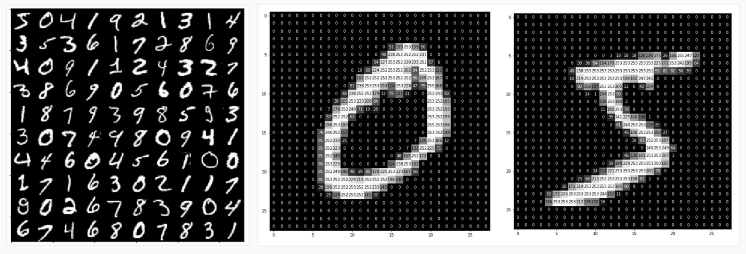

*60k images for training*<br>
*10k images for testing*<br>
*Image size: 28x28*

In [1]:
import keras
import numpy as np
from matplotlib import pyplot as plt
import time
# from MNIST_helper import plot_numbers, visualize_input
# from mlp_helper import plot_confusion_matrix
# import draw_nn

In [2]:
from MNIST_helper import plot_numbers, visualize_input, PlotLosses

In [3]:
from keras.datasets import mnist
(x, y), (x_test, y_test) = mnist.load_data()

validation = 0.20 # 20% for validatoin
N_validation_split = int(x.shape[0]*(1-validation))
# Training Set
x_train = x[:N_validation_split]
y_train = y[:N_validation_split]

# Cross Validation Set
x_val = x[N_validation_split:]
y_val = y[N_validation_split:]

In [4]:
print('Training set data:', x_train.shape)
print('Training labels:', y_train.shape)
print()
print('CV set data:', x_val.shape)
print('CV labels:', y_val.shape)
print()
print('Testing set data:',x_test.shape)
print('Testing labels:', y_test.shape)

Training set data: (48000, 28, 28)
Training labels: (48000,)

CV set data: (12000, 28, 28)
CV labels: (12000,)

Testing set data: (10000, 28, 28)
Testing labels: (10000,)


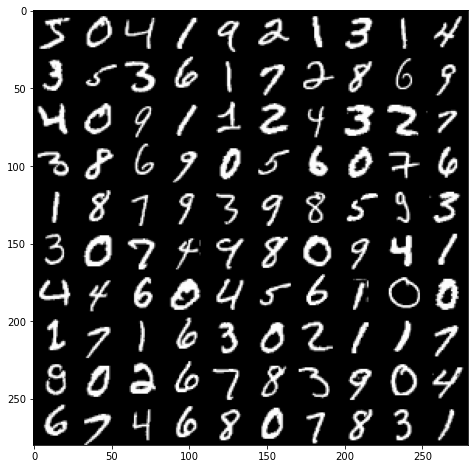

In [5]:
plot_numbers(x_train,range(100), columns=10, figsize=(8, 8)) #Plotting first 100 numbers

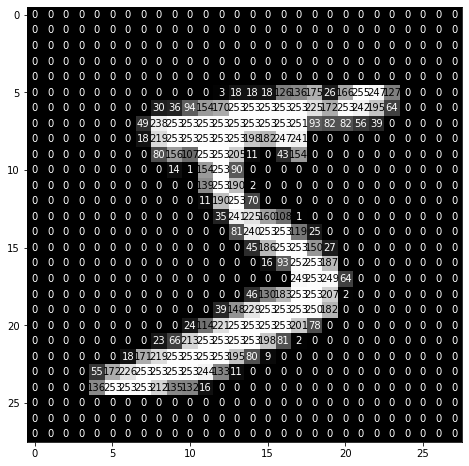

In [6]:
fig = plt.figure(figsize = (8,8)) 
ax = fig.add_subplot(111)
visualize_input(x_train[0], ax)
plt.show() #Plotting in grayscale

In [7]:
# Normalization
x_train = x_train/255
x_val = x_val/255
x_test = x_test/255

##### 
##### 
#### Multinomial logistic regression

In [8]:
from sklearn.linear_model import LogisticRegression
# from sklearn.datasets import fetch_mldata

In [9]:
x_train_flattened = x_train.reshape(-1,784)
x_val_flattened = x_val.reshape(-1,784)
x_test_flattened = x_test.reshape(-1,784)

In [10]:
clf_logistic = LogisticRegression(multi_class='multinomial', 
                                  solver='saga', max_iter=10, tol=0.05)
clf_logistic.fit(x_train_flattened, y_train)

LogisticRegression(max_iter=10, multi_class='multinomial', solver='saga',
                   tol=0.05)

In [11]:
train_score_logistic = clf_logistic.score(x_train_flattened, y_train)
val_score_logistic = clf_logistic.score(x_val_flattened, y_val)
test_score_logistic = clf_logistic.score(x_test_flattened, y_test)
print('Train score:', train_score_logistic, '\n',
      'Validation score:', val_score_logistic, '\n ',
      'Test score:', test_score_logistic)

Train score: 0.9301666666666667 
 Validation score: 0.92825 
  Test score: 0.926


In [16]:
# Regularization parameter. C = 1/λ
# Default=1.0. Inverse of regularization strength; must be a positive float, smaller values specify stronger regularization.
for C in [0.01, 0.1, 1, 10, 100]: 
    clf_logistic = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=10, tol=0.05, C=C)
    clf_logistic.fit(x_train_flattened, y_train)
    train_score_logistic = clf_logistic.score(x_train_flattened, y_train)
    val_score_logistic = clf_logistic.score(x_val_flattened, y_val)
    test_score_logistic = clf_logistic.score(x_test_flattened, y_test)
    print(f"Scores for C={C}: Train:{train_score_logistic}, Validation: {val_score_logistic}, Test: {test_score_logistic}")

Scores for C=0.01: Train:0.9160416666666666, Validation: 0.9181666666666667, Test: 0.9188
Scores for C=0.1: Train:0.9274583333333334, Validation: 0.9265, Test: 0.9242
Scores for C=1: Train:0.9305, Validation: 0.9288333333333333, Test: 0.9259
Scores for C=10: Train:0.930375, Validation: 0.9285, Test: 0.9253
Scores for C=100: Train:0.9309583333333333, Validation: 0.9288333333333333, Test: 0.9245


##### 
##### 
#### Neural network (1 layer)

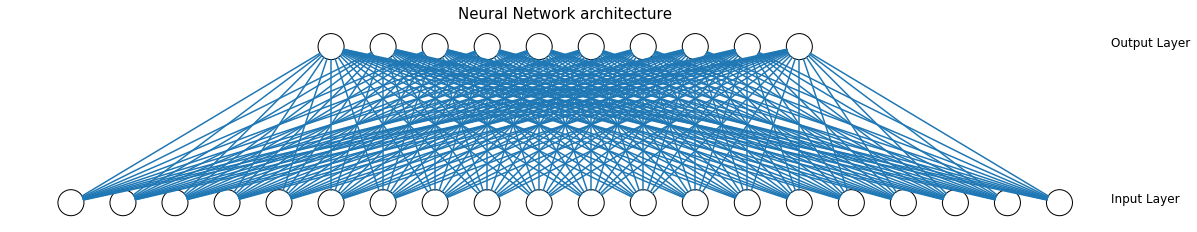

784 input units and 10 output units

In [16]:
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
# from keras.layers.normalization import BatchNormalization
# from keras import optimizers
import tensorflow as tf
from tensorflow.keras import optimizers
from keras.utils import np_utils
import keras.backend as K


In [17]:
x_train.shape[1:]

(28, 28)

In [18]:
# One hot encoding
y_train_categorical = keras.utils.np_utils.to_categorical(y_train) 
y_val_categorical = keras.utils.np_utils.to_categorical(y_val) 
y_test_categorical = keras.utils.np_utils.to_categorical(y_test) 
print(y_train_categorical.shape)
for i in range(10):
    print(y_train[i], y_train_categorical[i])

(48000, 10)
5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
2 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
3 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [19]:
x_train.shape

(48000, 28, 28)

In [23]:
K.clear_session() # Necesario para usar tensorboard para que no de error al correrlo por segunda vez

output_size = 10
# Creo el modelo
model_single_layer = Sequential()
model_single_layer.add(Flatten(input_shape=x_train.shape[1:])) # Flatten input shape, this can be done before defining the model
model_single_layer.add(Dense(output_size, 
                             kernel_initializer='normal', name='Salida')) # One dense, output. 10 units
model_single_layer.add(Activation('softmax')) # Softmax for multiclass
model_single_layer.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Salida (Dense)               (None, 10)                7850      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


<!-- 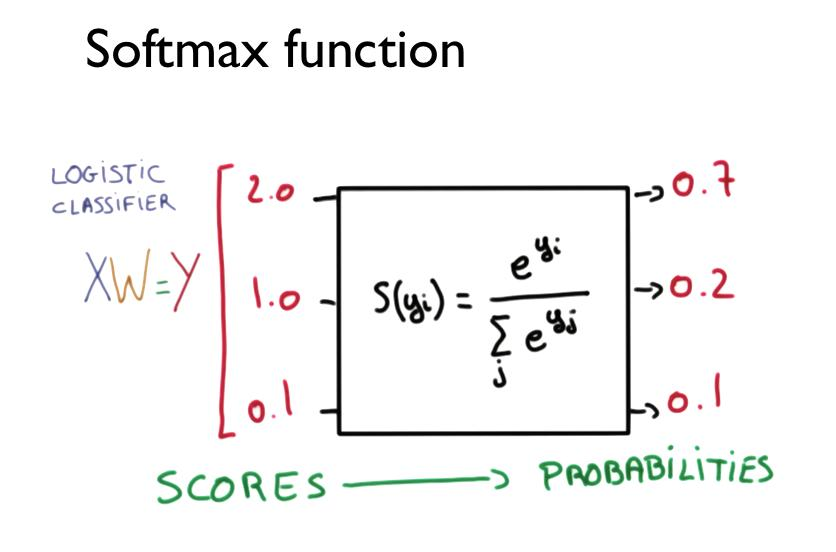 -->

<div>
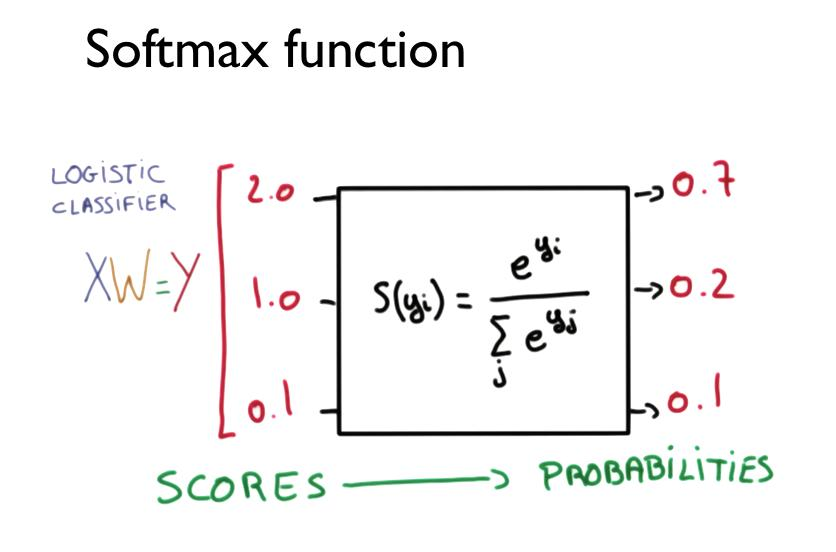
</div>

In [21]:
# Callbacks for plots
## Callback for viz.
plot_losses = PlotLosses(plot_interval=10, evaluate_interval=None, x_val=x_val, y_val_categorical=y_val_categorical)
## Callback for weights
checkpointer = ModelCheckpoint(filepath='log_reg.mnist.hdf5', verbose=1, save_best_only=True)
tbCB = TensorBoard(log_dir='./logs_logistic_reg_'+str(int(time.time())), histogram_freq=1, batch_size=32, write_graph=True, 
                   write_grads=True, write_images=True, embeddings_freq=0, 
                   embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, 
                   update_freq='epoch')

##### 
##### SGD (LR=0.01, 500 epochs)

In [22]:
lr = 0.01
SGD = tf.keras.optimizers.SGD(learning_rate=lr)
model_single_layer.compile(loss = 'categorical_crossentropy', optimizer=SGD, metrics=['accuracy'])

How accurate the model will be without training? If we assume randomness and knowing we have 10 outputs (numbers to predict), make sense an accuracy near 10% 

Weights shape: (784, 10)
Biases:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


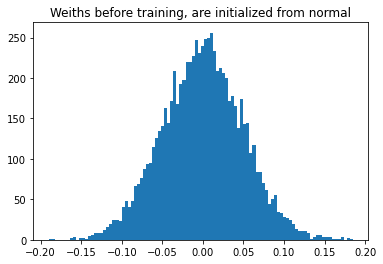

In [23]:
weights = model_single_layer.get_weights()[0]
biases = model_single_layer.get_weights()[1]
print('Weights shape:', weights.shape)
print('Biases: ', biases)
plt.hist(weights.flatten(), 100)
plt.title('Weiths before training, are initialized from normal')
plt.show()

In [24]:
score = model_single_layer.evaluate(x_test, y_test_categorical, verbose=0)
print("Loss: ", score[0])
print("Accuracy: ", score[1])

Loss:  2.3481717109680176
Accuracy:  0.10180000215768814


##### 
##### Training with SGD (LR=0.01, 500 epochs)

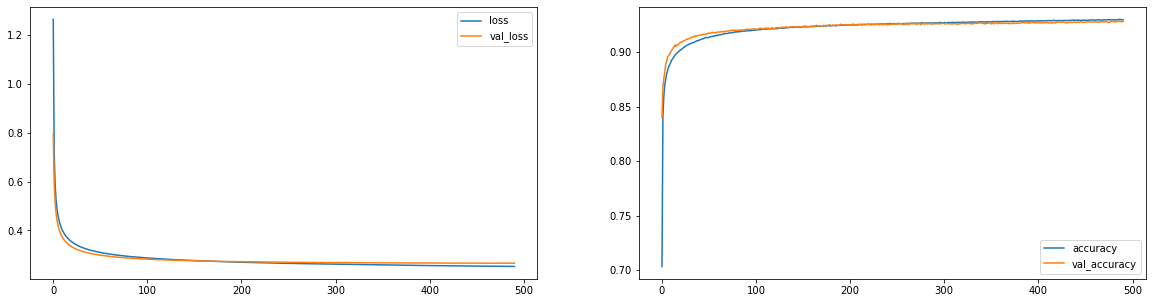


Epoch 00491: val_loss did not improve from 0.26594
Epoch 492/500
480/480 [==============================] - 1s 1ms/step - loss: 0.2527 - accuracy: 0.9298 - val_loss: 0.2660 - val_accuracy: 0.9271

Epoch 00492: val_loss did not improve from 0.26594
Epoch 493/500
480/480 [==============================] - 1s 2ms/step - loss: 0.2527 - accuracy: 0.9297 - val_loss: 0.2660 - val_accuracy: 0.9281

Epoch 00493: val_loss did not improve from 0.26594
Epoch 494/500
480/480 [==============================] - 1s 1ms/step - loss: 0.2526 - accuracy: 0.9298 - val_loss: 0.2660 - val_accuracy: 0.9277

Epoch 00494: val_loss did not improve from 0.26594
Epoch 495/500
480/480 [==============================] - 1s 1ms/step - loss: 0.2526 - accuracy: 0.9297 - val_loss: 0.2660 - val_accuracy: 0.9273

Epoch 00495: val_loss did not improve from 0.26594
Epoch 496/500
480/480 [==============================] - 1s 1ms/step - loss: 0.2526 - accuracy: 0.9296 - val_loss: 0.2659 - val_accuracy: 0.9282

Epoch 00496: v

In [26]:
# batch_size = 1000
batch_size = 100
model_single_layer.fit(x_train, 
                       y_train_categorical,
                       epochs=500, batch_size=batch_size, 
                       verbose=1, 
                       validation_data = (x_val, y_val_categorical),
                       callbacks=[plot_losses, checkpointer],
                      )

In [ ]:
score = model_single_layer.evaluate(x_test, y_test_categorical, verbose=0)
print("Loss: ", score[0])
print("Accuracy: ", score[1])
print('Check that results are similar to what we had in the logistic reg.')

In [ ]:
weights = model_single_layer.get_weights()[0]
biases = model_single_layer.get_weights()[1]
print(weights.shape)
print(biases)
plt.hist(weights.flatten(), 100)
plt.title('Weiths after training w/ SGD')
plt.show()

When we have weights concentrated on 0, is because there are many units not influencing the model

##### 
##### Training with Adam (LR=0.01, 250 epochs)

In [ ]:
K.clear_session() # Necesario para usar tensorboard para que no de error al correrlo por segunda vez

output_size = 10
# Creo el modelo
model_single_layer = Sequential()
model_single_layer.add(Flatten(input_shape=x_train.shape[1:])) # Flatten input shape, this can be done before defining the model
model_single_layer.add(Dense(output_size, 
                             kernel_initializer='normal', name='Salida')) # One dense, output. 10 units
model_single_layer.add(Activation('softmax')) # Softmax for multiclass
model_single_layer.summary()

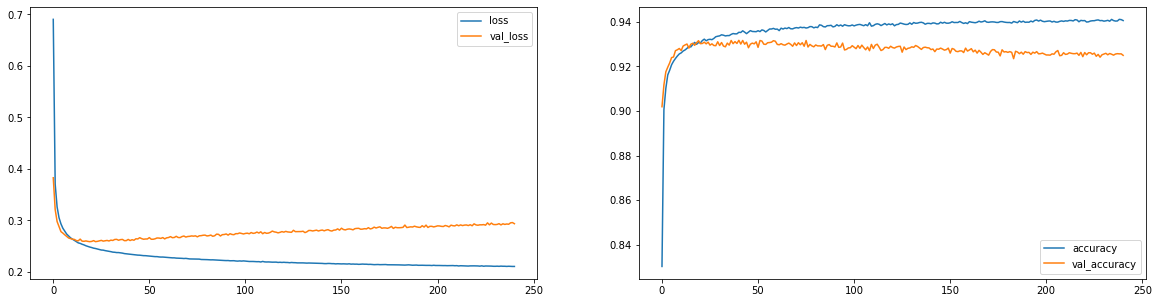


Epoch 00241: val_loss did not improve from 0.25854
Epoch 242/250
480/480 [==============================] - 1s 2ms/step - loss: 0.2104 - accuracy: 0.9406 - val_loss: 0.2930 - val_accuracy: 0.9258

Epoch 00242: val_loss did not improve from 0.25854
Epoch 243/250
480/480 [==============================] - 1s 2ms/step - loss: 0.2103 - accuracy: 0.9406 - val_loss: 0.2930 - val_accuracy: 0.9254

Epoch 00243: val_loss did not improve from 0.25854
Epoch 244/250
480/480 [==============================] - 1s 1ms/step - loss: 0.2102 - accuracy: 0.9408 - val_loss: 0.2927 - val_accuracy: 0.9252

Epoch 00244: val_loss did not improve from 0.25854
Epoch 245/250
480/480 [==============================] - 1s 2ms/step - loss: 0.2103 - accuracy: 0.9405 - val_loss: 0.2938 - val_accuracy: 0.9258

Epoch 00245: val_loss did not improve from 0.25854
Epoch 246/250
480/480 [==============================] - 1s 2ms/step - loss: 0.2101 - accuracy: 0.9409 - val_loss: 0.2938 - val_accuracy: 0.9249

Epoch 00246: v

In [24]:
lr = 0.001
SGD = tf.keras.optimizers.Adam(learning_rate=lr)
model_single_layer.compile(loss = 'categorical_crossentropy', optimizer=SGD, metrics=['accuracy'])

batch_size = 1000
batch_size = 100
model_single_layer.fit(x_train, 
                       y_train_categorical,
                       epochs=250, batch_size=batch_size, 
                       verbose=1, 
                       validation_data = (x_val, y_val_categorical),
                       callbacks=[plot_losses, checkpointer],
                      )

In [29]:
score = model_single_layer.evaluate(x_test, y_test_categorical, verbose=0)
print("Loss: ", score[0])
print("Accuracy: ", score[1])
print('Check that results are similar to what we had in the logistic reg.')

Loss:  0.31004267930984497
Accuracy:  0.9235000014305115
Check that results are similar to what we had in the logistic reg.


(784, 10)
[-0.8800535   1.7458798   0.18719237 -0.7142353   0.36941597  2.268063
 -0.7655325   1.4497489  -2.5263672  -0.7159818 ]


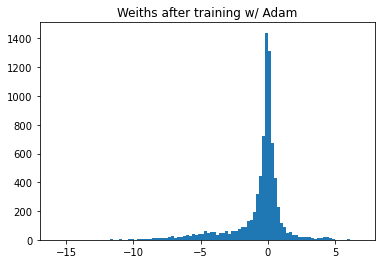

In [27]:
weights = model_single_layer.get_weights()[0]
biases = model_single_layer.get_weights()[1]
print(weights.shape)
print(biases)
plt.hist(weights.flatten(), 100)
plt.title('Weiths after training w/ Adam')
plt.show()

Compare with wegiths before train